# Testing and Analyzing Image Values

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path


In [15]:
# Load depth image from PNG
depth_path = "../data/processed_imgs/10_15_high_light_semantics_gaussian_20251020_181636/depth/frame_000031_1760644753166489098.png"

# Read with IMREAD_UNCHANGED to preserve 16-bit data
depth_png = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)

# Convert from millimeters (uint16) to meters (float32)
depth_meters = depth_png.astype(np.float32) / 1000.0

print(f"Depth image shape: {depth_meters.shape}")
print(f"Depth range: {depth_meters[depth_meters > 0].min():.3f}m to {depth_meters.max():.3f}m")
print(f"Mean depth: {depth_meters[depth_meters > 0].mean():.3f}m")


Depth image shape: (480, 640)
Depth range: 0.597m to 11.751m
Mean depth: 1.966m


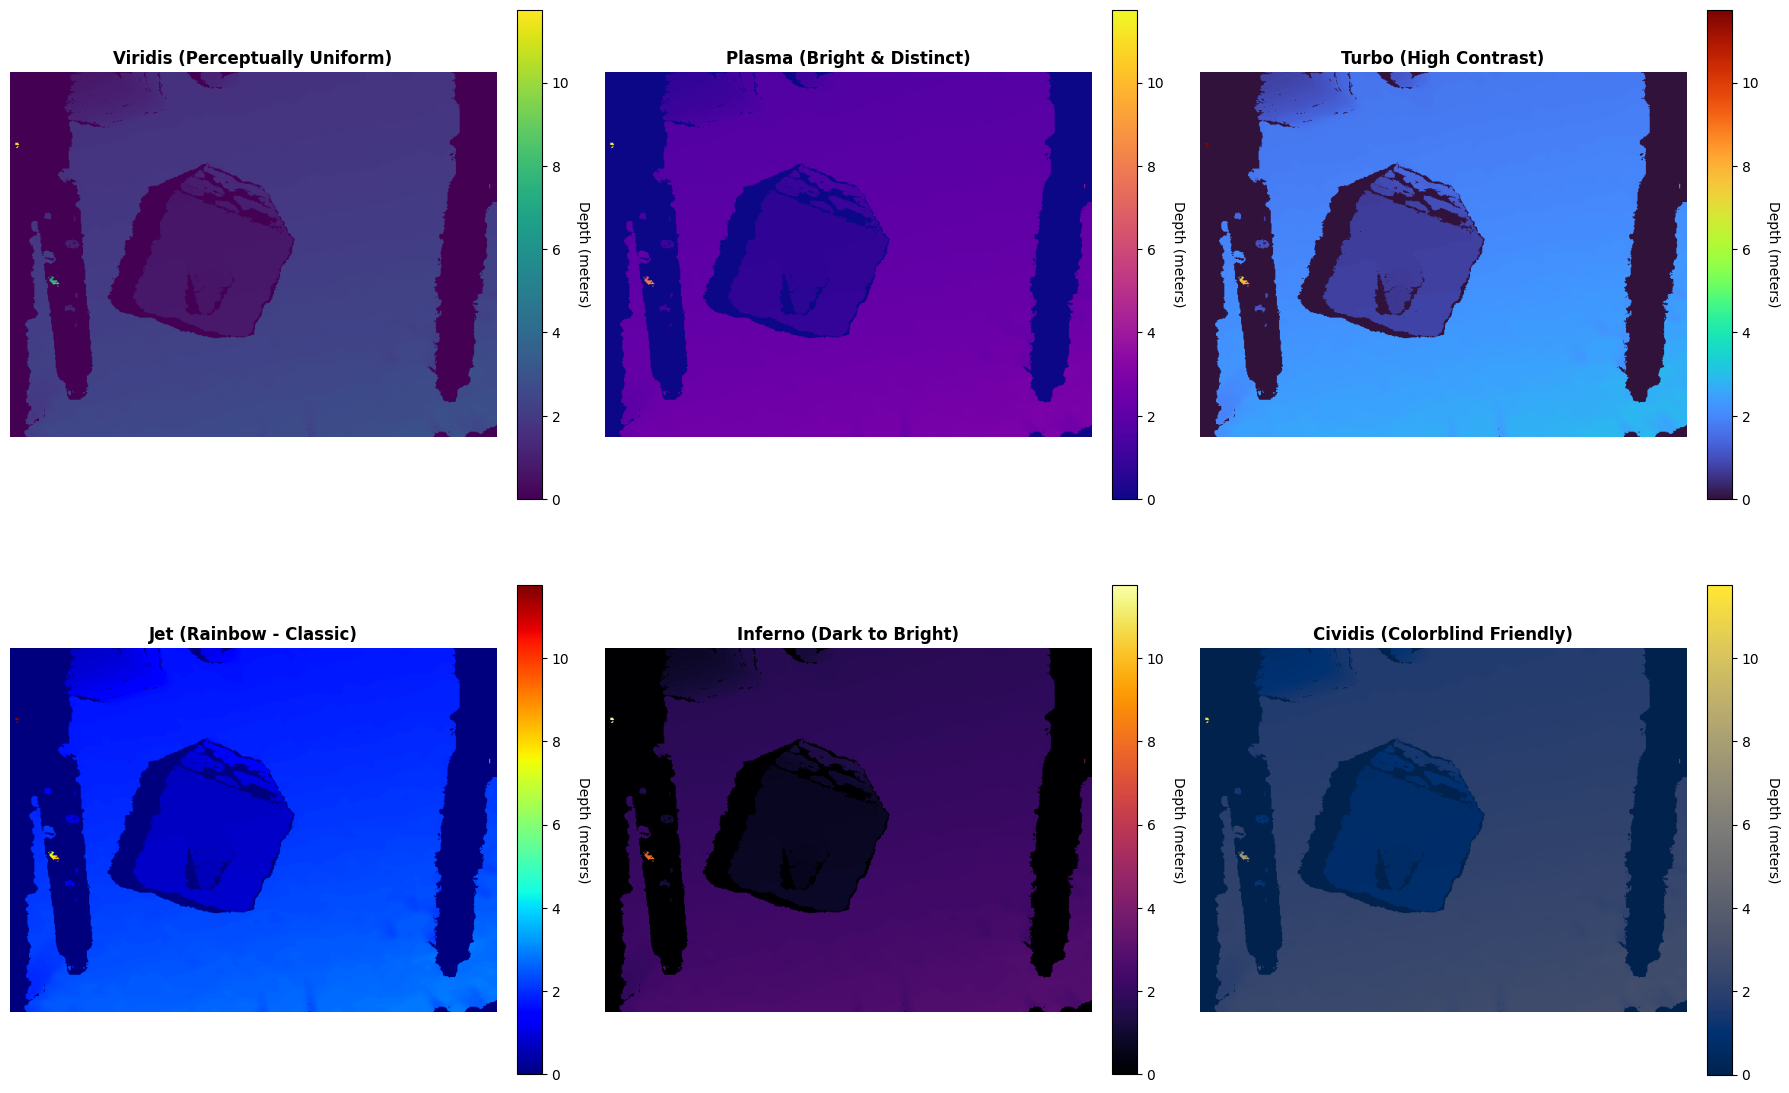

In [16]:
# Visualize depth map with different colormaps to compare
# These colormaps are good for showing depth differences

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# List of colormaps to try
colormaps = [
    ('viridis', 'Viridis (Perceptually Uniform)'),
    ('plasma', 'Plasma (Bright & Distinct)'),
    ('turbo', 'Turbo (High Contrast)'),
    ('jet', 'Jet (Rainbow - Classic)'),
    ('inferno', 'Inferno (Dark to Bright)'),
    ('cividis', 'Cividis (Colorblind Friendly)')
]

for idx, (cmap, title) in enumerate(colormaps):
    row = idx // 3
    col = idx % 3
    im = axes[row, col].imshow(depth_meters, cmap=cmap)
    axes[row, col].set_title(title, fontsize=12, fontweight='bold')
    axes[row, col].axis('off')
    cbar = plt.colorbar(im, ax=axes[row, col], fraction=0.046, pad=0.04)
    cbar.set_label('Depth (meters)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()


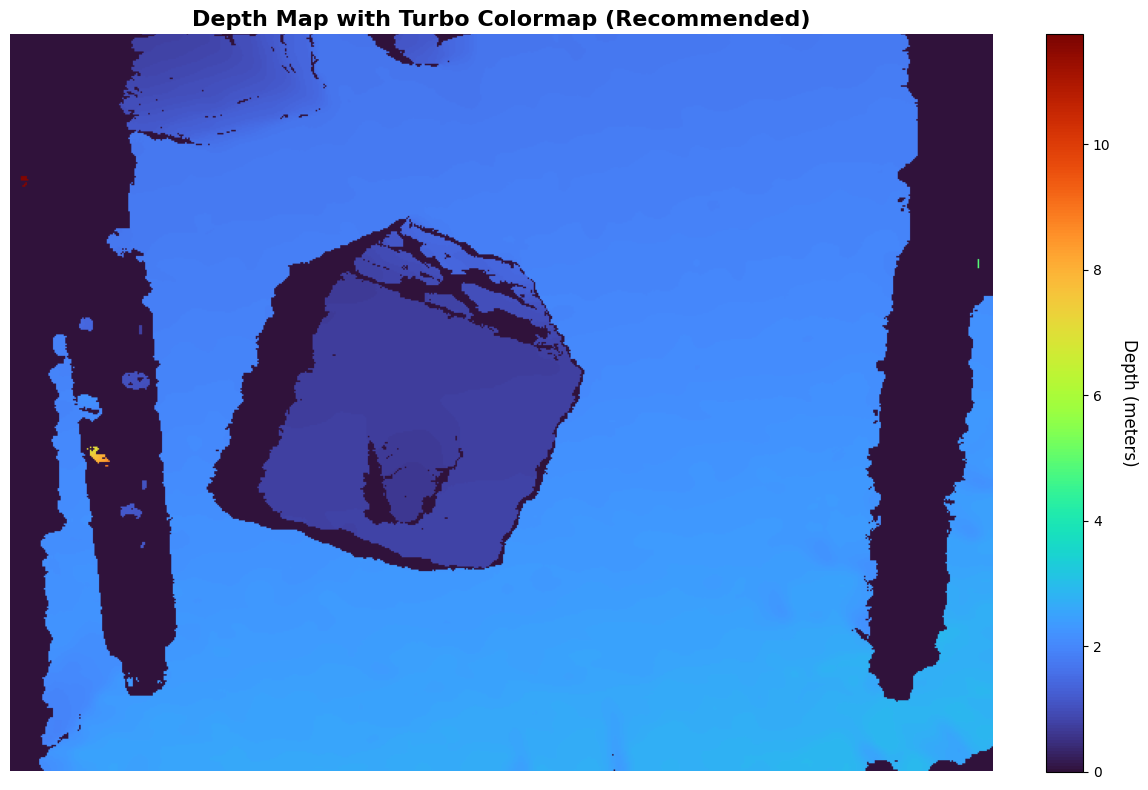

In [17]:
# My Recommendation: Turbo colormap for best depth distinction
# Turbo provides excellent contrast and makes it easy to distinguish different depths

plt.figure(figsize=(14, 8))
im = plt.imshow(depth_meters, cmap='turbo')
plt.title('Depth Map with Turbo Colormap (Recommended)', fontsize=16, fontweight='bold')
plt.axis('off')
cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
cbar.set_label('Depth (meters)', rotation=270, labelpad=20, fontsize=12)
plt.tight_layout()
plt.show()


## Custom Depth Range for Enhanced Contrast

You can also adjust the color range to focus on specific depth ranges:


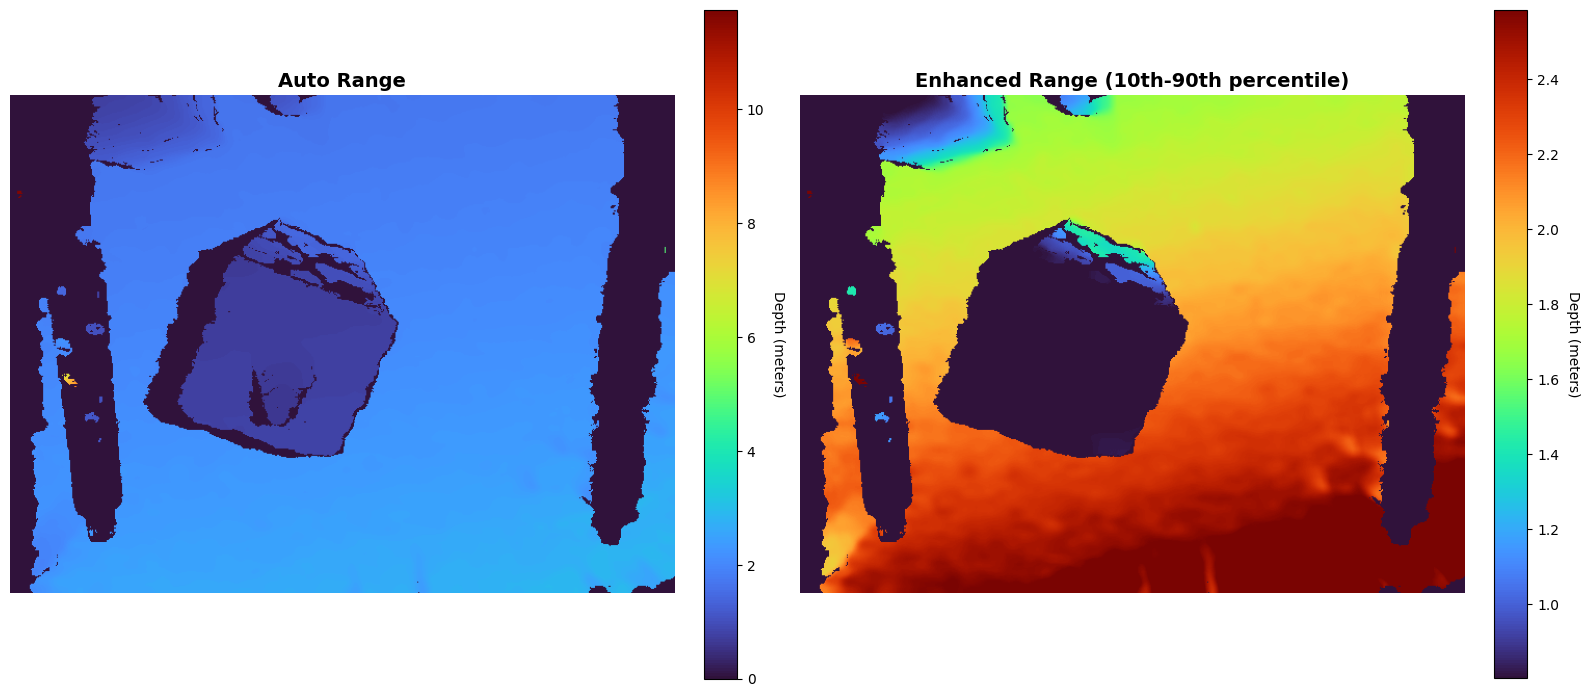

Full depth range: 0.597m to 11.751m
Enhanced range (10th-90th percentile): 0.801m to 2.586m


In [18]:
# Compare auto range vs custom range for better depth distinction
fig, axes = plt.subplots(1, 2, figsize=(16, 7))

# Auto range (default)
im1 = axes[0].imshow(depth_meters, cmap='turbo')
axes[0].set_title('Auto Range', fontsize=14, fontweight='bold')
axes[0].axis('off')
cbar1 = plt.colorbar(im1, ax=axes[0], fraction=0.046, pad=0.04)
cbar1.set_label('Depth (meters)', rotation=270, labelpad=15)

# Custom range - focus on middle depths for more contrast
# Adjust vmin and vmax to zoom into specific depth ranges
min_depth = depth_meters[depth_meters > 0].min()
max_depth = depth_meters.max()
percentile_10 = np.percentile(depth_meters[depth_meters > 0], 10)
percentile_90 = np.percentile(depth_meters[depth_meters > 0], 90)

im2 = axes[1].imshow(depth_meters, cmap='turbo', vmin=percentile_10, vmax=percentile_90)
axes[1].set_title('Enhanced Range (10th-90th percentile)', fontsize=14, fontweight='bold')
axes[1].axis('off')
cbar2 = plt.colorbar(im2, ax=axes[1], fraction=0.046, pad=0.04)
cbar2.set_label('Depth (meters)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

print(f"Full depth range: {min_depth:.3f}m to {max_depth:.3f}m")
print(f"Enhanced range (10th-90th percentile): {percentile_10:.3f}m to {percentile_90:.3f}m")
